In [2]:
import pandas as pd 
import numpy as nd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df =pd.read_csv(r"C:\Users\rjey0\Downloads\practise\K MEAN CLUSTER\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

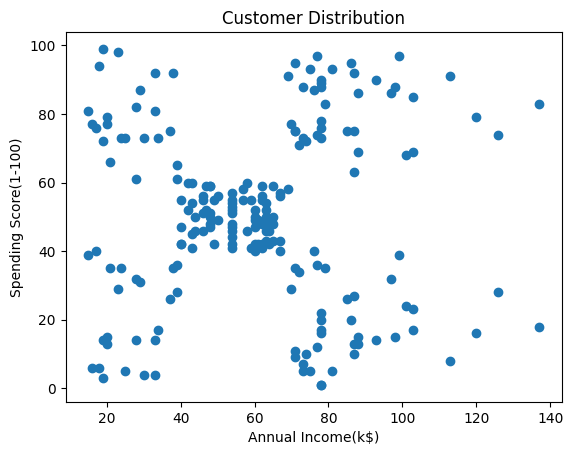

In [5]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.title('Customer Distribution')
plt.show()

In [6]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

WCSS values [400.0, 273.66888662642015, 157.70400815035947, 109.22822707921345, 65.5684081557168, 60.13287487193422, 49.668244837367986, 37.319122878338824, 32.49508119910091, 30.05932269404221]


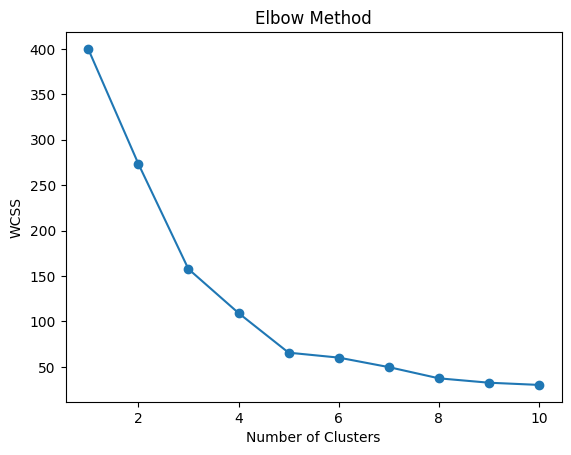

In [7]:
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
print("WCSS values",wcss)
plt.plot(range(1,11),wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Clusters'] = kmeans.fit_predict(X_scaled)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [9]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


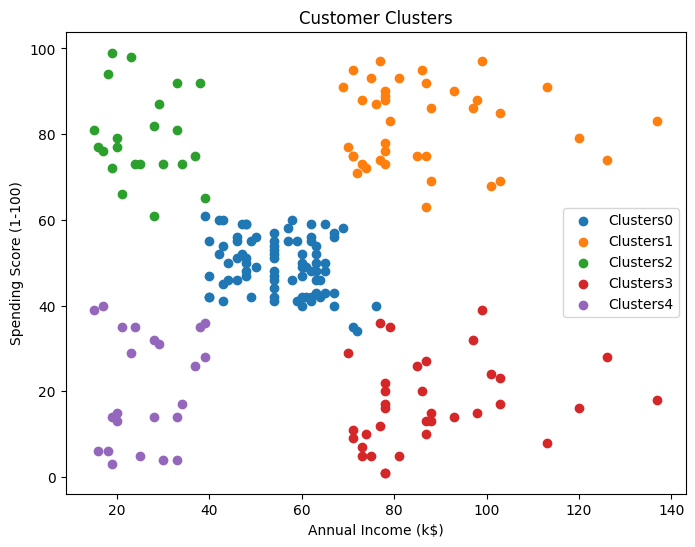

In [10]:
plt.figure(figsize=(8, 6))

for cluster in range(5):
    plt.scatter(
        df[df['Clusters'] == cluster]['Annual Income (k$)'],
        df[df['Clusters'] == cluster]['Spending Score (1-100)'],
        label=f'Clusters{cluster}'
    )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters')
plt.legend()
plt.show()


In [11]:
import joblib
joblib.dump(scalar, "scaler.pkl")
joblib.dump(kmeans, "kmeans_model.pkl")

['kmeans_model.pkl']